<a href="https://colab.research.google.com/github/itto3o/VehicleVisionSystem/blob/main/%EA%B3%BC%EC%A0%9C_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


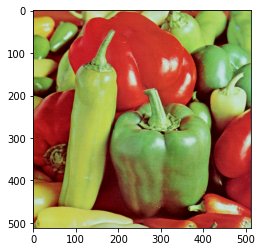

In [2]:
from google.colab.patches import cv2_imshow
import numpy as np
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('/content/gdrive/MyDrive/keimyeong Univ/VehicleVisionSystem/과제#2/peppers.png')
#BGR를 RGB순서로 바꾸기
RGB_img1 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

#원본 영상
plt.imshow(RGB_img1)

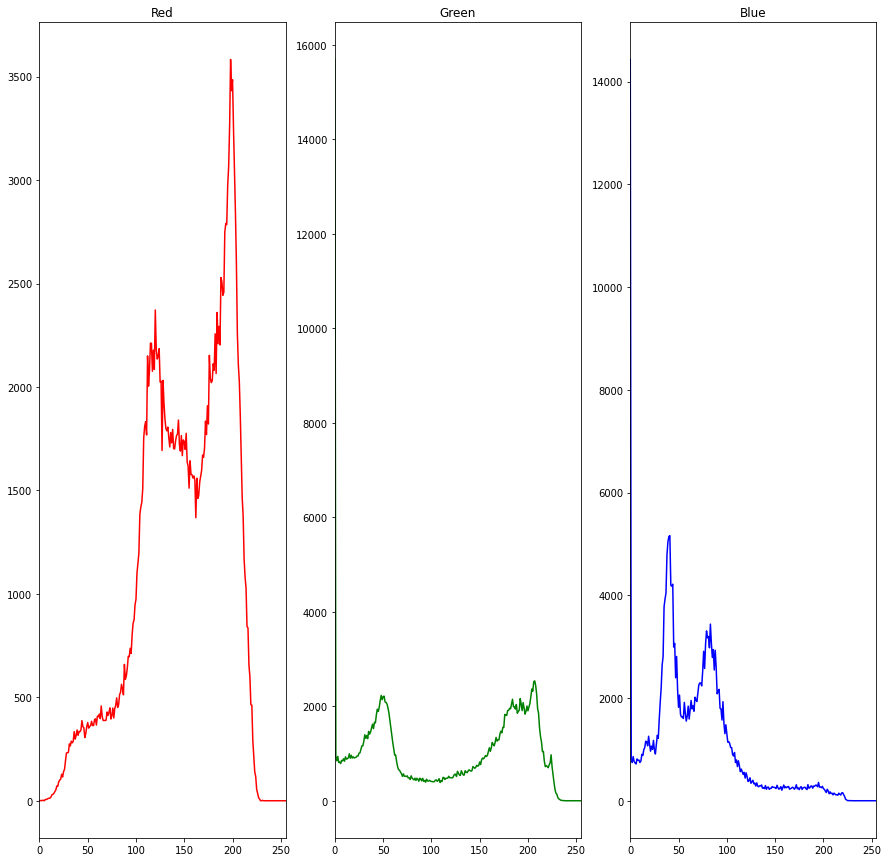

In [3]:
#RGB 채널 나누기
R_img, G_img, B_img = cv2.split(RGB_img1)

#화면 출력
plt.figure(figsize = (15, 15))
plt.axis("off")


#histogram, R_img 영상배열, 채널 0, 마스크 x, bin(기둥 개수) 256, x축 범위 0~255
hist_r = cv2.calcHist([R_img], [0], None, [256], [0, 255])

#3공간으로 나누기
plt.subplot(1, 3, 1)
plt.title("Red")
plt.plot(hist_r, color = 'r') #r색상 히스토그램 표현
plt.xlim([0,255])


hist_g = cv2.calcHist([G_img], [0], None, [256], [0, 255])

plt.subplot(1, 3, 2)
plt.title("Green")
plt.plot(hist_g, color = 'g')
plt.xlim([0, 255])


hist_b = cv2.calcHist([B_img], [0], None, [256], [0, 255])

plt.subplot(1, 3, 3)
plt.title("Blue")
plt.plot(hist_b, color = 'b')
plt.xlim([0, 255])

plt.show()

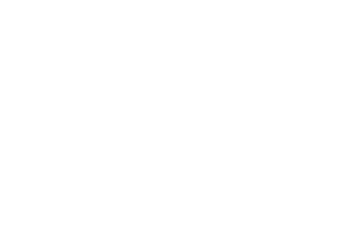

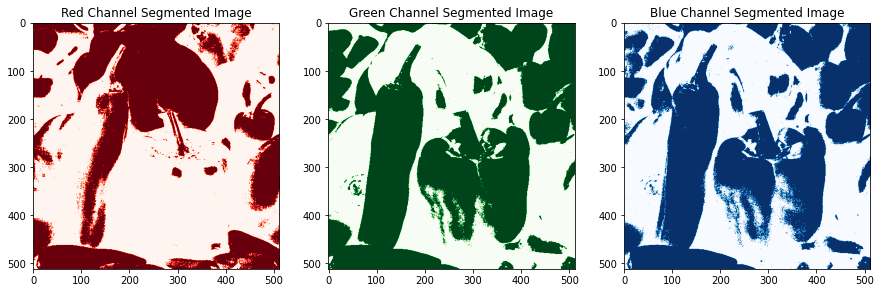

In [4]:
#red 영상 임계값 분할
#결과 영상
output_r = np.zeros((R_img.shape[0], R_img.shape[1]))

#임계값(히스토그램에서 봉우리가 분리되는 170 기준)
for h in range(R_img.shape[0]) :
  for w in range(R_img.shape[1]) :
    if(np.int32(R_img[h, w]) < 170) :
      output_r[h, w] = 0 #255 :엥 170보다 작으면 0이어야 하는게 아닌가
    else :
      output_r[h, w] = 255
    #print(output_r[h,w])

plt.axis("off")
#화면에 출력
plt.figure(figsize=(15, 15))

plt.subplot(1, 3, 1)
plt.title("Red Channel Segmented Image")
plt.imshow(output_r, cmap='Reds') #왜지 plt.plot(output_r, color = 'r')하면 이상한 결과가 나온다.
#imshow로 하면 이상하게 y축이 긴 현상도 나타나지 않는다.

#green 영상 임계값 분할
#결과 영상
output_g = np.zeros((G_img.shape[0], G_img.shape[1]))

#임계값(히스토그램에서 봉우리가 분리되는 110 기준)
for h in range(G_img.shape[0]) :
  for w in range(G_img.shape[1]) :
    if(np.int32(G_img[h, w]) < 110) :
      output_g[h, w] = 0
    else :
      output_g[h, w] = 255


plt.subplot(1, 3, 2)
plt.title("Green Channel Segmented Image")
plt.imshow(output_g, cmap = 'Greens')

#Blue 영상 임계값 분할
#결과 영상
output_b = np.zeros((B_img.shape[0], B_img.shape[1]))

#임계값(히스토그램에서 봉우리가 분리되는 60 기준)
for h in range(B_img.shape[0]) :
  for w in range(B_img.shape[1]) :
    if(np.int32(B_img[h, w]) < 60) :
      output_b[h, w] = 0
    else :
      output_b[h, w] = 255

#화면에 출력
plt.subplot(1, 3, 3)
plt.title("Blue Channel Segmented Image")
plt.imshow(output_b, cmap='Blues')

plt.show()

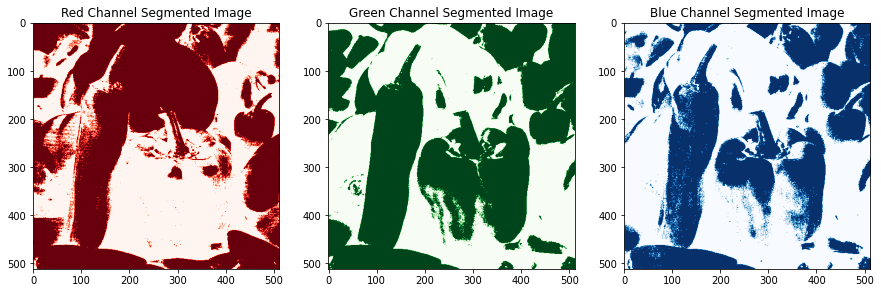

In [16]:
#전역 임계값으로 영상 분할하기

#red channel
#초기 임계값
T1_r = 170
T2_r = 0 #이전 임계값 저장 변수
T0 = 1 # 종료 조건 임계값 설정

#결과물
output_r = np.zeros((R_img.shape[0], R_img.shape[1]))

#임계값 업데이트 함수
def threshold_update(img, output) :
  sum1 = 0
  count1 = 1
  sum2 = 0
  count2 = 1

  #h, w가 파라미터에 있는데 argument로 이미 output.shape만큼을 h, w에 주는데
  #h w가 반복문에 있으니까 반복문이 시작도 안하는듯? (그냥 indent문제였다...)
  for h in range(img.shape[0]) :
    for w in range(img.shape[1]) :
      #그룹 별 픽셀 총합 계산
      if(output[h, w] == 255) :
        sum1 = sum1 + img[h, w]
        count1 = count1 + 1
      else :
        sum2 = sum2 + img[h, w]
        count2 = count2 + 1

  #그룹별 평균
  avg1 = sum1/count1
  avg2 = sum2/count2
  #새 임계값 계산
  T2 = np.int32(avg1 + avg2) / 2
  return T2

#얘들도 다 함수로 만들면 좋겠다..
#초기 임계값 적용
for h in range(R_img.shape[0]) :
  for w in range(R_img.shape[1]) :
    if(R_img[h, w] > T1_r) :
      output_r[h,w] = 255
    else :
      output_r[h, w] = 0

#종료 조건을 만족할 때까지 반복
while True :
  #새 임계값 설정
  T2_r = threshold_update(R_img, output_r)

  #새 임계값과 이전 임계값의 변화 측정
  if(np.abs(T1_r - T2_r) < T0) : #abs : 절대값
    #위의 종료조건을 만족하면 새로운 임계값으로 이진화 후 출력
    for h in range(R_img.shape[0]) :
      for w in range(R_img.shape[1]) :
        if(R_img[h, w] > T2_r) :
          output_r[h, w] = 255
        else :
          output_r[h, w] = 0
    break

  #종료조건을 만족하지 않으면
  else :
    #원래 임계값으로 이진화
    T1_r = T2_r
    for h in range(R_img.shape[0]) :
      for w in range(R_img.shape[1]) :
        if(R_img[h, w] > T1_r) :
          output_r[h, w] = 255
        else :
          output_r[h, w] = 0

#그림 화면 출력
plt.figure(figsize = (15, 15))
plt.subplot(1, 3, 1)
plt.title("Red Channel Segmented Image")
plt.imshow(output_r, cmap = 'Reds')


#Green Channel
#초기 임계값
T1_g = 110
T2_g = 0 #이전 임계값 저장 변수
T0 = 1 # 종료 조건 임계값 설정

#결과물
output_g = np.zeros((G_img.shape[0], G_img.shape[1]))

#초기 임계값 적용
for h in range(G_img.shape[0]) :
  for w in range(G_img.shape[1]) :
    if(G_img[h, w] > T1_g) :
      output_g[h,w] = 255
    else :
      output_g[h, w] = 0

#종료 조건을 만족할 때까지 반복
while True :
  #새 임계값 설정
  T2_g = threshold_update(G_img, output_g)

  #새 임계값과 이전 임계값의 변화 측정
  if(np.abs(T1_g - T2_g) < T0) : #abs : 절대값
    #위의 종료조건을 만족하면 새로운 임계값으로 이진화 후 출력
    for h in range(G_img.shape[0]) :
      for w in range(G_img.shape[1]) :
        if(G_img[h, w] > T2_g) :
          output_g[h, w] = 255
        else :
          output_g[h, w] = 0
    break

  #종료조건을 만족하지 않으면
  else :
    #원래 임계값으로 이진화
    T1_g = T2_g
    for h in range(G_img.shape[0]) :
      for w in range(G_img.shape[1]) :
        if(G_img[h, w] > T1_g) :
          output_g[h, w] = 255
        else :
          output_g[h, w] = 0

#그림 화면 출력
plt.subplot(1, 3, 2)
plt.title("Green Channel Segmented Image")
plt.imshow(output_g, cmap = 'Greens')


#Blue Channel
#초기 임계값
T1_b = 60
T2_b = 0 #이전 임계값 저장 변수
T0 = 1 # 종료 조건 임계값 설정

#결과물
output_b = np.zeros((B_img.shape[0], B_img.shape[1]))

#초기 임계값 적용
for h in range(B_img.shape[0]) :
  for w in range(B_img.shape[1]) :
    if(B_img[h, w] > T1_b) :
      output_b[h,w] = 255
    else :
      output_b[h, w] = 0

#종료 조건을 만족할 때까지 반복
while True :
  #새 임계값 설정
  T2_b = threshold_update(B_img, output_b)

  #새 임계값과 이전 임계값의 변화 측정
  if(np.abs(T1_b - T2_b) < T0) : #abs : 절대값
    #위의 종료조건을 만족하면 새로운 임계값으로 이진화 후 출력
    for h in range(B_img.shape[0]) :
      for w in range(B_img.shape[1]) :
        if(B_img[h, w] > T2_b) :
          output_b[h, w] = 255
        else :
          output_b[h, w] = 0
    break

  #종료조건을 만족하지 않으면
  else :
    #원래 임계값으로 이진화
    T1_b = T2_b
    for h in range(B_img.shape[0]) :
      for w in range(B_img.shape[1]) :
        if(B_img[h, w] > T1_b) :
          output_b[h, w] = 255
        else :
          output_b[h, w] = 0

#그림 화면 출력
plt.subplot(1, 3, 3)
plt.title("Blue Channel Segmented Image")
plt.imshow(output_b, cmap = 'Blues')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:110: RuntimeWarning: overflow encountered in ubyte_scalars


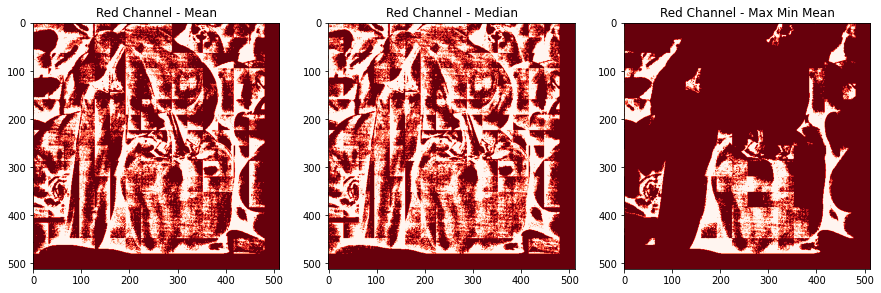

In [20]:
#적응적 임계값 적용하기
#1) 블록 안 밝기 평균, 2)중간값, 3)최대값 최소값 평균
#으로 해야하기 때문에, 그것도 채널 별로 하고 싶기 때문에 셀당 red - 1) 2) 3)으로 할 계획이다.

#Red Channel - 1) 블록 안의 픽셀 밝기 분포에 대한 평균

#가로 세로 블록의 개수
N = 16 #(512픽셀이라 딱 나눠떨어지는 숫자로 골랐다.)

#블록 당 가로와 세로 크기 계산
dimh = np.int32(R_img.shape[0]/N)
dimw = np.int32(R_img.shape[1]/N)

dh_rest = np.int32(R_img.shape[0] % N)
dw_rest = np.int32(R_img.shape[1] % N)

#임계값 적용 후 output
output_mean = np.zeros((R_img.shape[0], R_img.shape[1]))
mean = np.zeros((N, N)) #평균값 저장 배열

#각 블록의 평균값 계산 함수
def mean_func(img, dimh, dimw, h, w) :
  count = 1
  sum = 0
  avg = 0
  for y in range(h, h+dimh) :
    for x in range(w, w+dimw) :
      sum = sum + img[y, x] #y, x가 맞나..? 높이, 너비? 평균이라 상관없나
      count = count+1

  avg = np.int32(sum / count)
  return avg

#각 블록의 평균값 계산
for h in range(0, R_img.shape[0]-dh_rest, dimh) : #0부터 dimh만큼 R_img[0]까지
  for w in range(0, R_img.shape[1] - dw_rest, dimw) :
    if(h + dimh < R_img.shape[0] and w + dimw < R_img.shape[1]) :
      mean[np.int32(h / dimh), np.int32(w/dimw)] = mean_func(R_img, dimh, dimw, h, w) #h/dimh 하면 dimh만큼이 한 픽셀이됨

#임계값 적용
for h in range(R_img.shape[0] - dh_rest) :
  for w in range(R_img.shape[1]- dw_rest) :
    if(R_img[h, w] >= mean[np.int32(h/dimh), np.int32(w/dimw)]) :
      output_mean[h, w] = 255
    else :
      output_mean[h, w] = 0

#화면 출력
plt.figure(figsize = (15, 15))

plt.subplot(1, 3, 1)
plt.title("Red Channel - Mean")
plt.imshow(output_mean, cmap = 'Reds')



#Red Channel - 2) 블록 안의 픽셀 밝기의 중간값

#임계값 적용 후 output
output_median = np.zeros((R_img.shape[0], R_img.shape[1]))
median = np.zeros((N, N)) #중간값 저장 배열

#각 블록의 평균값 계산 함수
def median_func(img, dimh, dimw, h, w) :
  blockList = []
  median = 0
  for y in range(h, h+dimh) :
    for x in range(w, w+dimw) :
      blockList.append(img[y, x]) #블록 안의 픽셀값을 list에 넣고

  median = np.median(blockList) #np함수의 median으로 찾아서 출력
  return median

#각 블록의 중간값 계산
for h in range(0, R_img.shape[0] - dh_rest, dimh) : #0부터 dimh만큼 R_img[0]까지
  for w in range(0, R_img.shape[1] - dw_rest, dimw) :
    if(h + dimh < R_img.shape[0] and w + dimw < R_img.shape[1]) :
      median[np.int32(h / dimh), np.int32(w/dimw)] = median_func(R_img, dimh, dimw, h, w) #h/dimh 하면 dimh만큼이 한 픽셀이됨

#임계값 적용
for h in range(R_img.shape[0] - dh_rest) :
  for w in range(R_img.shape[1] - dw_rest) :
    if(R_img[h, w] >= median[np.int32(h/dimh), np.int32(w/dimw)]) :
      output_median[h, w] = 255
    else :
      output_median[h, w] = 0

#화면 출력
plt.subplot(1, 3, 2)
plt.title("Red Channel - Median")
plt.imshow(output_median, cmap = 'Reds')


#Red Channel - 2) 블록 안의 픽셀 밝기의 최대값과 최소값의 평균 (max min mean)

#임계값 적용 후 output
output_mmm = np.zeros((R_img.shape[0], R_img.shape[1]))
mmm = np.zeros((N, N)) #중간값 저장 배열

#각 블록의 평균값 계산 함수
def mmm_func(img, dimh, dimw, h, w) :
  blockList = []
  mmm = 0
  for y in range(h, h+dimh) :
    for x in range(w, w+dimw) :
      blockList.append(img[y, x]) #블록 안의 픽셀값을 list에 넣고
  
  max = np.max(blockList)
  min = np.min(blockList)
  mmm = (max + min) / 2
  return mmm

#각 블록의 중간값 계산
for h in range(0, R_img.shape[0] - dh_rest, dimh) : #0부터 dimh만큼 R_img[0]까지
  for w in range(0, R_img.shape[1] - dw_rest, dimw) :
    if(h + dimh < R_img.shape[0] and w + dimw < R_img.shape[1]) :
      mmm[np.int32(h / dimh), np.int32(w/dimw)] = mmm_func(R_img, dimh, dimw, h, w) #h/dimh 하면 dimh만큼이 한 픽셀이됨

#임계값 적용
for h in range(R_img.shape[0] - dh_rest) :
  for w in range(R_img.shape[1] - dw_rest) :
    if(R_img[h, w] >= mmm[np.int32(h/dimh), np.int32(w/dimw)]) :
      output_mmm[h, w] = 255
    else :
      output_mmm[h, w] = 0

#화면 출력
plt.subplot(1, 3, 3)
plt.title("Red Channel - Max Min Mean")
plt.imshow(output_mmm, cmap = 'Reds')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:105: RuntimeWarning: overflow encountered in ubyte_scalars


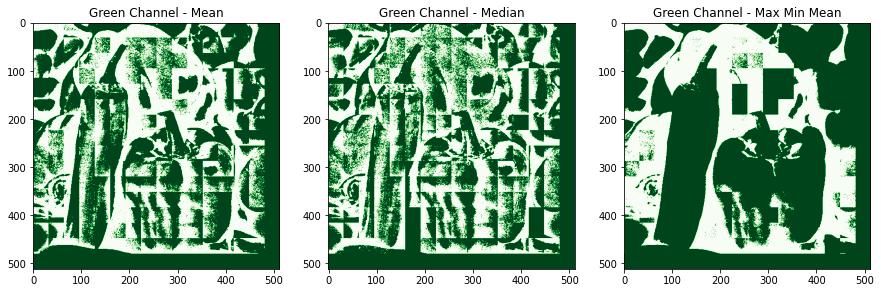

In [21]:
#Green Channel - 1) 블록 안의 픽셀 밝기 분포에 대한 평균

#가로 세로 블록의 개수
N = 16 #(512픽셀이라 딱 나눠떨어지는 숫자로 골랐다.)

#블록 당 가로와 세로 크기 계산
dimh = np.int32(G_img.shape[0]/N)
dimw = np.int32(G_img.shape[1]/N)

dh_rest = np.int32(G_img.shape[0] % N)
dw_rest = np.int32(G_img.shape[1] % N)

#임계값 적용 후 output
output_mean = np.zeros((G_img.shape[0], G_img.shape[1]))
mean = np.zeros((N, N)) #평균값 저장 배열

#각 블록의 평균값 계산 함수
def mean_func(img, dimh, dimw, h, w) :
  count = 1
  sum = 0
  avg = 0
  for y in range(h, h+dimh) :
    for x in range(w, w+dimw) :
      sum = sum + img[y, x] #y, x가 맞나..? 높이, 너비? 평균이라 상관없나
      count = count+1

  avg = np.int32(sum / count)
  return avg

#각 블록의 평균값 계산
for h in range(0, G_img.shape[0]-dh_rest, dimh) : #0부터 dimh만큼 R_img[0]까지
  for w in range(0, G_img.shape[1] - dw_rest, dimw) :
    if(h + dimh < G_img.shape[0] and w + dimw < G_img.shape[1]) :
      mean[np.int32(h / dimh), np.int32(w/dimw)] = mean_func(G_img, dimh, dimw, h, w) #h/dimh 하면 dimh만큼이 한 픽셀이됨

#임계값 적용
for h in range(G_img.shape[0] - dh_rest) :
  for w in range(G_img.shape[1]- dw_rest) :
    if(G_img[h, w] >= mean[np.int32(h/dimh), np.int32(w/dimw)]) :
      output_mean[h, w] = 255
    else :
      output_mean[h, w] = 0

#화면 출력
plt.figure(figsize = (15, 15))

plt.subplot(1, 3, 1)
plt.title("Green Channel - Mean")
plt.imshow(output_mean, cmap = 'Greens')


#Green Channel - 2) 블록 안의 픽셀 밝기의 중간값

#임계값 적용 후 output
output_median = np.zeros((G_img.shape[0], G_img.shape[1]))
median = np.zeros((N, N)) #중간값 저장 배열

#각 블록의 평균값 계산 함수
def median_func(img, dimh, dimw, h, w) :
  blockList = []
  median = 0
  for y in range(h, h+dimh) :
    for x in range(w, w+dimw) :
      blockList.append(img[y, x]) #블록 안의 픽셀값을 list에 넣고

  median = np.median(blockList) #np함수의 median으로 찾아서 출력
  return median

#각 블록의 중간값 계산
for h in range(0, G_img.shape[0] - dh_rest, dimh) : #0부터 dimh만큼 R_img[0]까지
  for w in range(0, G_img.shape[1] - dw_rest, dimw) :
    if(h + dimh < G_img.shape[0] and w + dimw < G_img.shape[1]) :
      median[np.int32(h / dimh), np.int32(w/dimw)] = median_func(G_img, dimh, dimw, h, w) #h/dimh 하면 dimh만큼이 한 픽셀이됨

#임계값 적용
for h in range(G_img.shape[0] - dh_rest) :
  for w in range(G_img.shape[1] - dw_rest) :
    if(G_img[h, w] >= median[np.int32(h/dimh), np.int32(w/dimw)]) :
      output_median[h, w] = 255
    else :
      output_median[h, w] = 0

#화면 출력
plt.subplot(1, 3, 2)
plt.title("Green Channel - Median")
plt.imshow(output_median, cmap = 'Greens')


#Green Channel - 2) 블록 안의 픽셀 밝기의 최대값과 최소값의 평균 (max min mean)

#임계값 적용 후 output
output_mmm = np.zeros((G_img.shape[0], G_img.shape[1]))
mmm = np.zeros((N, N)) #중간값 저장 배열

#각 블록의 평균값 계산 함수
def mmm_func(img, dimh, dimw, h, w) :
  blockList = []
  mmm = 0
  for y in range(h, h+dimh) :
    for x in range(w, w+dimw) :
      blockList.append(img[y, x]) #블록 안의 픽셀값을 list에 넣고
  
  max = np.max(blockList)
  min = np.min(blockList)
  mmm = (max + min) / 2
  return mmm

#각 블록의 중간값 계산
for h in range(0, G_img.shape[0] - dh_rest, dimh) : #0부터 dimh만큼 R_img[0]까지
  for w in range(0, G_img.shape[1] - dw_rest, dimw) :
    if(h + dimh < G_img.shape[0] and w + dimw < G_img.shape[1]) :
      mmm[np.int32(h / dimh), np.int32(w/dimw)] = mmm_func(G_img, dimh, dimw, h, w) #h/dimh 하면 dimh만큼이 한 픽셀이됨

#임계값 적용
for h in range(G_img.shape[0] - dh_rest) :
  for w in range(G_img.shape[1] - dw_rest) :
    if(G_img[h, w] >= mmm[np.int32(h/dimh), np.int32(w/dimw)]) :
      output_mmm[h, w] = 255
    else :
      output_mmm[h, w] = 0

#화면 출력
plt.subplot(1, 3, 3)
plt.title("Green Channel - Max Min Mean")
plt.imshow(output_mmm, cmap = 'Greens')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:105: RuntimeWarning: overflow encountered in ubyte_scalars


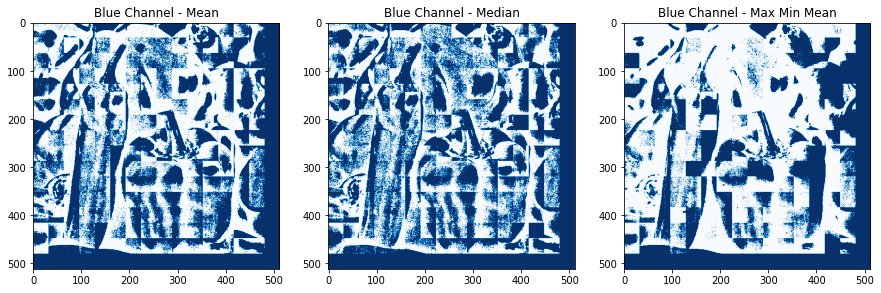

In [22]:
#Blue Channel - 1) 블록 안의 픽셀 밝기 분포에 대한 평균

#가로 세로 블록의 개수
N = 16 #(512픽셀이라 딱 나눠떨어지는 숫자로 골랐다.)

#블록 당 가로와 세로 크기 계산
dimh = np.int32(B_img.shape[0]/N)
dimw = np.int32(B_img.shape[1]/N)

dh_rest = np.int32(B_img.shape[0] % N)
dw_rest = np.int32(B_img.shape[1] % N)

#임계값 적용 후 output
output_mean = np.zeros((B_img.shape[0], B_img.shape[1]))
mean = np.zeros((N, N)) #평균값 저장 배열

#각 블록의 평균값 계산 함수
def mean_func(img, dimh, dimw, h, w) :
  count = 1
  sum = 0
  avg = 0
  for y in range(h, h+dimh) :
    for x in range(w, w+dimw) :
      sum = sum + img[y, x] #y, x가 맞나..? 높이, 너비? 평균이라 상관없나
      count = count+1

  avg = np.int32(sum / count)
  return avg

#각 블록의 평균값 계산
for h in range(0, B_img.shape[0]-dh_rest, dimh) : #0부터 dimh만큼 R_img[0]까지
  for w in range(0, B_img.shape[1] - dw_rest, dimw) :
    if(h + dimh < B_img.shape[0] and w + dimw < B_img.shape[1]) :
      mean[np.int32(h / dimh), np.int32(w/dimw)] = mean_func(B_img, dimh, dimw, h, w) #h/dimh 하면 dimh만큼이 한 픽셀이됨

#임계값 적용
for h in range(B_img.shape[0] - dh_rest) :
  for w in range(B_img.shape[1]- dw_rest) :
    if(B_img[h, w] >= mean[np.int32(h/dimh), np.int32(w/dimw)]) :
      output_mean[h, w] = 255
    else :
      output_mean[h, w] = 0

#화면 출력
plt.figure(figsize = (15, 15))

plt.subplot(1, 3, 1)
plt.title("Blue Channel - Mean")
plt.imshow(output_mean, cmap = 'Blues')


#Blue Channel - 2) 블록 안의 픽셀 밝기의 중간값

#임계값 적용 후 output
output_median = np.zeros((B_img.shape[0], B_img.shape[1]))
median = np.zeros((N, N)) #중간값 저장 배열

#각 블록의 평균값 계산 함수
def median_func(img, dimh, dimw, h, w) :
  blockList = []
  median = 0
  for y in range(h, h+dimh) :
    for x in range(w, w+dimw) :
      blockList.append(img[y, x]) #블록 안의 픽셀값을 list에 넣고

  median = np.median(blockList) #np함수의 median으로 찾아서 출력
  return median

#각 블록의 중간값 계산
for h in range(0, B_img.shape[0] - dh_rest, dimh) : #0부터 dimh만큼 R_img[0]까지
  for w in range(0, B_img.shape[1] - dw_rest, dimw) :
    if(h + dimh < B_img.shape[0] and w + dimw < B_img.shape[1]) :
      median[np.int32(h / dimh), np.int32(w/dimw)] = median_func(B_img, dimh, dimw, h, w) #h/dimh 하면 dimh만큼이 한 픽셀이됨

#임계값 적용
for h in range(B_img.shape[0] - dh_rest) :
  for w in range(B_img.shape[1] - dw_rest) :
    if(B_img[h, w] >= median[np.int32(h/dimh), np.int32(w/dimw)]) :
      output_median[h, w] = 255
    else :
      output_median[h, w] = 0

#화면 출력
plt.subplot(1, 3, 2)
plt.title("Blue Channel - Median")
plt.imshow(output_median, cmap = 'Blues')


#Blue Channel - 2) 블록 안의 픽셀 밝기의 최대값과 최소값의 평균 (max min mean)

#임계값 적용 후 output
output_mmm = np.zeros((B_img.shape[0], B_img.shape[1]))
mmm = np.zeros((N, N)) #중간값 저장 배열

#각 블록의 평균값 계산 함수
def mmm_func(img, dimh, dimw, h, w) :
  blockList = []
  mmm = 0
  for y in range(h, h+dimh) :
    for x in range(w, w+dimw) :
      blockList.append(img[y, x]) #블록 안의 픽셀값을 list에 넣고
  
  max = np.max(blockList)
  min = np.min(blockList)
  mmm = (max + min) / 2
  return mmm

#각 블록의 중간값 계산
for h in range(0, B_img.shape[0] - dh_rest, dimh) : #0부터 dimh만큼 R_img[0]까지
  for w in range(0, B_img.shape[1] - dw_rest, dimw) :
    if(h + dimh < B_img.shape[0] and w + dimw < B_img.shape[1]) :
      mmm[np.int32(h / dimh), np.int32(w/dimw)] = mmm_func(B_img, dimh, dimw, h, w) #h/dimh 하면 dimh만큼이 한 픽셀이됨

#임계값 적용
for h in range(B_img.shape[0] - dh_rest) :
  for w in range(B_img.shape[1] - dw_rest) :
    if(B_img[h, w] >= mmm[np.int32(h/dimh), np.int32(w/dimw)]) :
      output_mmm[h, w] = 255
    else :
      output_mmm[h, w] = 0

#화면 출력
plt.subplot(1, 3, 3)
plt.title("Blue Channel - Max Min Mean")
plt.imshow(output_mmm, cmap = 'Blues')

여태까지 한거를 YCrCb로 해보기

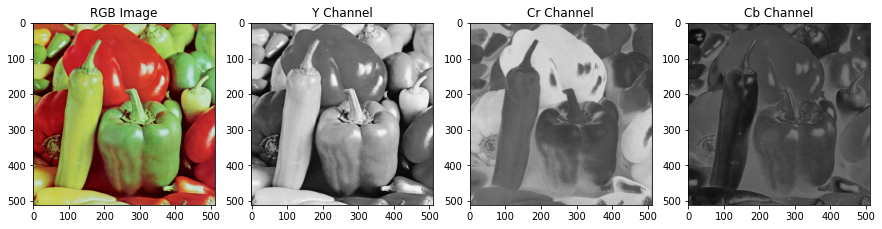

In [49]:
YCrCb_img = cv2.cvtColor(RGB_img1, cv2.COLOR_RGB2YCrCb)
Y_img, Cr_img, Cb_img = cv2.split(YCrCb_img)

#화면 출력
plt.figure(figsize = (15, 15))
plt.subplot(1, 4, 1)
plt.title("RGB Image")
plt.imshow(RGB_img1)

plt.subplot(1, 4, 2)
plt.title("Y Channel")
plt.imshow(Y_img, cmap = 'gray')

plt.subplot(1, 4, 3)
plt.title("Cr Channel")
plt.imshow(Cr_img, cmap = 'gray')

plt.subplot(1, 4, 4)
plt.title("Cb Channel")
plt.imshow(Cb_img, cmap = 'gray')

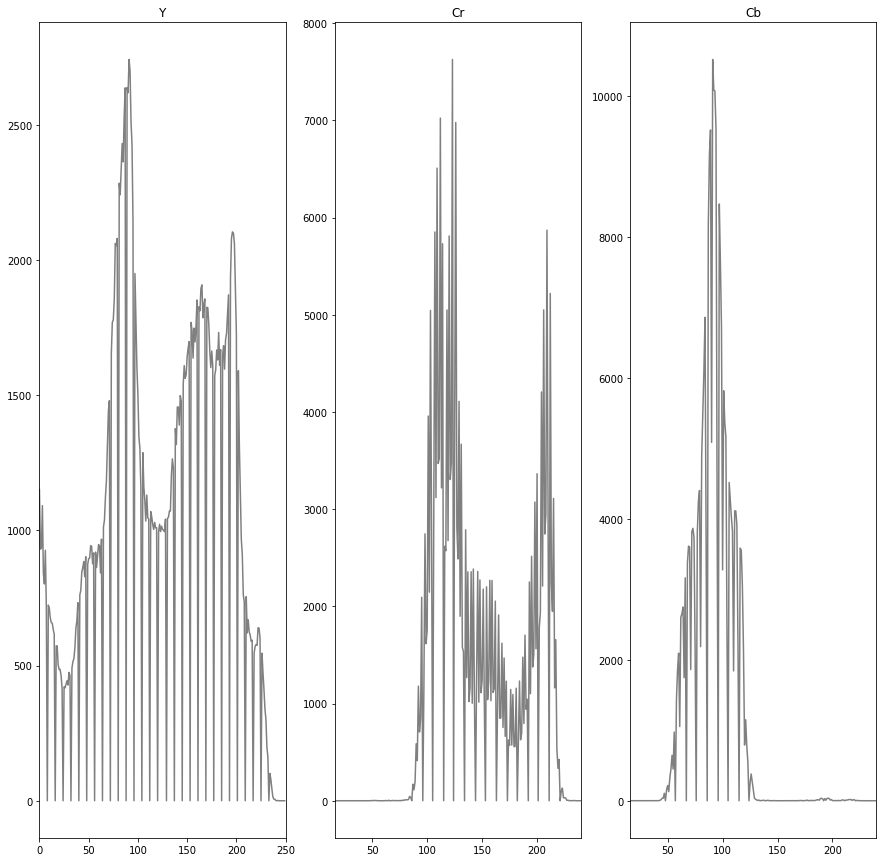

In [79]:
#YCrCb 히스토그램
#Y는 0~1, Cr Cb는 -0.5~0.5
#화면 출력
plt.figure(figsize = (15, 15))

#histogram, Y_img 영상배열, 채널 0, 마스크 x, bin(기둥 개수) 256, x축 범위 0~1
hist_Y = cv2.calcHist([Y_img], [0], None, [250], [16, 235])

#3공간으로 나누기
plt.subplot(1, 3, 1)
plt.title("Y")
plt.plot(hist_Y, color = 'gray')
plt.xlim([0, 250]) 


hist_Cr = cv2.calcHist([Cr_img], [0], None, [250], [16, 240])

plt.subplot(1, 3, 2)
plt.title("Cr")
plt.plot(hist_Cr, color = 'gray')
plt.xlim([16, 240])


hist_Cb = cv2.calcHist([Cb_img], [0], None, [250], [16, 240])

plt.subplot(1, 3, 3)
plt.title("Cb")
plt.plot(hist_Cb, color = 'gray')
plt.xlim([16, 240])

plt.show()

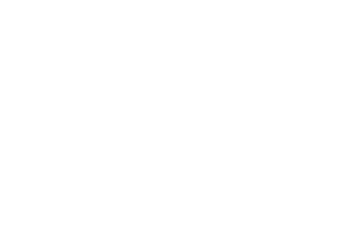

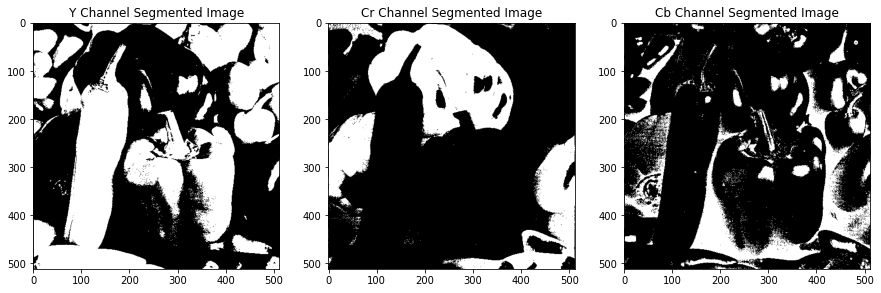

In [84]:
#Y채널 영상 임계값 분할
#결과 영상
output_y = np.zeros((Y_img.shape[0], Y_img.shape[1]))

#임계값(히스토그램에서 봉우리가 분리되는 130 기준)
for h in range(Y_img.shape[0]) :
  for w in range(Y_img.shape[1]) :
    if(np.int32(Y_img[h, w]) < 130) :
      output_y[h, w] = 0
    else :
      output_y[h, w] = 255

plt.axis("off")
#화면에 출력
plt.figure(figsize=(15, 15))

plt.subplot(1, 3, 1)
plt.title("Y Channel Segmented Image")
plt.imshow(output_y, cmap='gray')

#Cr 영상 임계값 분할
#결과 영상
output_cr = np.zeros((Cr_img.shape[0], Cr_img.shape[1]))

#임계값(히스토그램에서 봉우리가 분리되는 180 기준)
for h in range(Cr_img.shape[0]) :
  for w in range(Cr_img.shape[1]) :
    if(np.int32(Cr_img[h, w]) < 180) :
      output_cr[h, w] = 0
    else :
      output_cr[h, w] = 255


plt.subplot(1, 3, 2)
plt.title("Cr Channel Segmented Image")
plt.imshow(output_cr, cmap = 'gray')

#Blue 영상 임계값 분할
#결과 영상
output_cb = np.zeros((Cb_img.shape[0], Cb_img.shape[1]))

#임계값(히스토그램에서 봉우리가 분리되는... 기준이 뭘까.. 130으로 잡아..? ==> 이렇게하니까 다 까맣게 나옴 ==> 구별할 수 있는 110정도로
for h in range(Cb_img.shape[0]) :
  for w in range(Cb_img.shape[1]) :
    if(np.int32(Cb_img[h, w]) < 110) :
      output_cb[h, w] = 0
    else :
      output_cb[h, w] = 255

#화면에 출력
plt.subplot(1, 3, 3)
plt.title("Cb Channel Segmented Image")
plt.imshow(output_cb, cmap='gray')

plt.show()

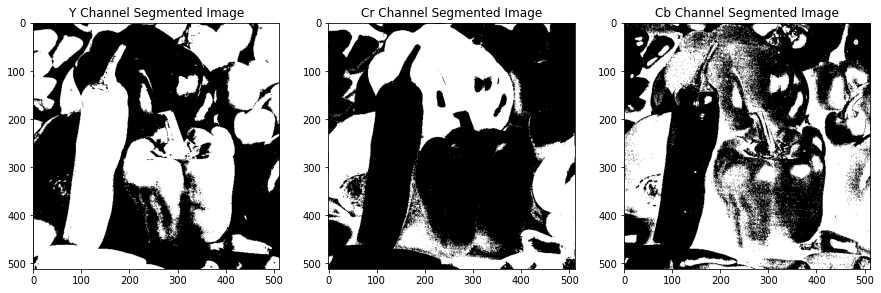

In [87]:
#전역 임계값으로 영상 분할하기

#Y channel
#초기 임계값
T1_y = 130
T2_y = 0 #이전 임계값 저장 변수
T0 = 1 # 종료 조건 임계값 설정

#결과물
output_y = np.zeros((Y_img.shape[0], Y_img.shape[1]))

#임계값 업데이트 함수
def threshold_update(img, output) :
  sum1 = 0
  count1 = 1
  sum2 = 0
  count2 = 1

  for h in range(img.shape[0]) :
    for w in range(img.shape[1]) :
      #그룹 별 픽셀 총합 계산
      if(output[h, w] == 255) :
        sum1 = sum1 + img[h, w]
        count1 = count1 + 1
      else :
        sum2 = sum2 + img[h, w]
        count2 = count2 + 1

  #그룹별 평균
  avg1 = sum1/count1
  avg2 = sum2/count2
  #새 임계값 계산
  T2 = np.int32(avg1 + avg2) / 2
  return T2

#초기 임계값 적용
for h in range(Y_img.shape[0]) :
  for w in range(Y_img.shape[1]) :
    if(Y_img[h, w] > T1_y) :
      output_y[h,w] = 255
    else :
      output_y[h, w] = 0

#종료 조건을 만족할 때까지 반복
while True :
  #새 임계값 설정
  T2_y = threshold_update(Y_img, output_y)

  #새 임계값과 이전 임계값의 변화 측정
  if(np.abs(T1_y - T2_y) < T0) : #abs : 절대값
    #위의 종료조건을 만족하면 새로운 임계값으로 이진화 후 출력
    for h in range(Y_img.shape[0]) :
      for w in range(Y_img.shape[1]) :
        if(Y_img[h, w] > T2_y) :
          output_y[h, w] = 255
        else :
          output_y[h, w] = 0
    break

  #종료조건을 만족하지 않으면
  else :
    #원래 임계값으로 이진화
    T1_y = T2_y
    for h in range(Y_img.shape[0]) :
      for w in range(Y_img.shape[1]) :
        if(Y_img[h, w] > T1_y) :
          output_y[h, w] = 255
        else :
          output_y[h, w] = 0

#그림 화면 출력
plt.figure(figsize = (15, 15))
plt.subplot(1, 3, 1)
plt.title("Y Channel Segmented Image")
plt.imshow(output_y, cmap = 'gray')


#Cr Channel
#초기 임계값
T1_cr = 180
T2_cr = 0 #이전 임계값 저장 변수
T0 = 1 # 종료 조건 임계값 설정

#결과물
output_cr = np.zeros((Cr_img.shape[0], Cr_img.shape[1]))

#초기 임계값 적용
for h in range(Cr_img.shape[0]) :
  for w in range(Cr_img.shape[1]) :
    if(Cr_img[h, w] > T1_cr) :
      output_cr[h,w] = 255
    else :
      output_cr[h, w] = 0

#종료 조건을 만족할 때까지 반복
while True :
  #새 임계값 설정
  T2_cr = threshold_update(Cr_img, output_cr)

  #새 임계값과 이전 임계값의 변화 측정
  if(np.abs(T1_cr - T2_cr) < T0) : #abs : 절대값
    #위의 종료조건을 만족하면 새로운 임계값으로 이진화 후 출력
    for h in range(Cr_img.shape[0]) :
      for w in range(Cr_img.shape[1]) :
        if(Cr_img[h, w] > T2_cr) :
          output_cr[h, w] = 255
        else :
          output_cr[h, w] = 0
    break

  #종료조건을 만족하지 않으면
  else :
    #원래 임계값으로 이진화
    T1_cr = T2_cr
    for h in range(Cr_img.shape[0]) :
      for w in range(Cr_img.shape[1]) :
        if(Cr_img[h, w] > T1_cr) :
          output_cr[h, w] = 255
        else :
          output_cr[h, w] = 0

#그림 화면 출력
plt.subplot(1, 3, 2)
plt.title("Cr Channel Segmented Image")
plt.imshow(output_cr, cmap = 'gray')


#Cb Channel
#초기 임계값
T1_cb = 110
T2_cb = 0 #이전 임계값 저장 변수
T0 = 1 # 종료 조건 임계값 설정

#결과물
output_cb = np.zeros((Cb_img.shape[0], Cb_img.shape[1]))

#초기 임계값 적용
for h in range(Cb_img.shape[0]) :
  for w in range(Cb_img.shape[1]) :
    if(Cb_img[h, w] > T1_cb) :
      output_cb[h,w] = 255
    else :
      output_cb[h, w] = 0

#종료 조건을 만족할 때까지 반복
while True :
  #새 임계값 설정
  T2_cb = threshold_update(Cb_img, output_cb)

  #새 임계값과 이전 임계값의 변화 측정
  if(np.abs(T1_cb - T2_cb) < T0) : #abs : 절대값
    #위의 종료조건을 만족하면 새로운 임계값으로 이진화 후 출력
    for h in range(Cb_img.shape[0]) :
      for w in range(Cb_img.shape[1]) :
        if(Cb_img[h, w] > T2_cb) :
          output_cb[h, w] = 255
        else :
          output_cb[h, w] = 0
    break

  #종료조건을 만족하지 않으면
  else :
    #원래 임계값으로 이진화
    T1_cb = T2_cb
    for h in range(Cb_img.shape[0]) :
      for w in range(Cb_img.shape[1]) :
        if(Cb_img[h, w] > T1_cb) :
          output_cb[h, w] = 255
        else :
          output_cb[h, w] = 0

#그림 화면 출력
plt.subplot(1, 3, 3)
plt.title("Cb Channel Segmented Image")
plt.imshow(output_cb, cmap = 'gray')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:106: RuntimeWarning: overflow encountered in ubyte_scalars


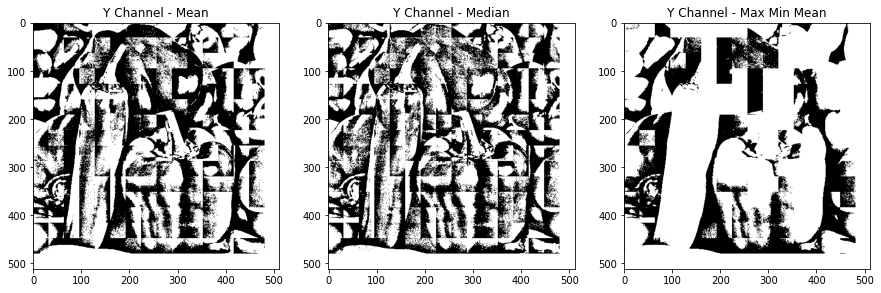

In [88]:
#Y Channel - 1) 블록 안의 픽셀 밝기 분포에 대한 평균

#가로 세로 블록의 개수
N = 16 #(512픽셀이라 딱 나눠떨어지는 숫자로 골랐다.)

#블록 당 가로와 세로 크기 계산
dimh = np.int32(Y_img.shape[0]/N)
dimw = np.int32(Y_img.shape[1]/N)

dh_rest = np.int32(Y_img.shape[0] % N)
dw_rest = np.int32(Y_img.shape[1] % N)

#임계값 적용 후 output
output_mean = np.zeros((Y_img.shape[0], Y_img.shape[1]))
mean = np.zeros((N, N)) #평균값 저장 배열

#각 블록의 평균값 계산 함수
def mean_func(img, dimh, dimw, h, w) :
  count = 1
  sum = 0
  avg = 0
  for y in range(h, h+dimh) :
    for x in range(w, w+dimw) :
      sum = sum + img[y, x] #y, x가 맞나..? 높이, 너비? 평균이라 상관없나
      count = count+1

  avg = np.int32(sum / count)
  return avg

#각 블록의 평균값 계산
for h in range(0, Y_img.shape[0]-dh_rest, dimh) : #0부터 dimh만큼 R_img[0]까지
  for w in range(0, Y_img.shape[1] - dw_rest, dimw) :
    if(h + dimh < Y_img.shape[0] and w + dimw < Y_img.shape[1]) :
      mean[np.int32(h / dimh), np.int32(w/dimw)] = mean_func(Y_img, dimh, dimw, h, w) #h/dimh 하면 dimh만큼이 한 픽셀이됨

#임계값 적용
for h in range(Y_img.shape[0] - dh_rest) :
  for w in range(Y_img.shape[1]- dw_rest) :
    if(Y_img[h, w] >= mean[np.int32(h/dimh), np.int32(w/dimw)]) :
      output_mean[h, w] = 255
    else :
      output_mean[h, w] = 0

#화면 출력
plt.figure(figsize = (15, 15))

plt.subplot(1, 3, 1)
plt.title("Y Channel - Mean")
plt.imshow(output_mean, cmap = 'gray')



#Y Channel - 2) 블록 안의 픽셀 밝기의 중간값

#임계값 적용 후 output
output_median = np.zeros((Y_img.shape[0], Y_img.shape[1]))
median = np.zeros((N, N)) #중간값 저장 배열

#각 블록의 평균값 계산 함수
def median_func(img, dimh, dimw, h, w) :
  blockList = []
  median = 0
  for y in range(h, h+dimh) :
    for x in range(w, w+dimw) :
      blockList.append(img[y, x]) #블록 안의 픽셀값을 list에 넣고

  median = np.median(blockList) #np함수의 median으로 찾아서 출력
  return median

#각 블록의 중간값 계산
for h in range(0, Y_img.shape[0] - dh_rest, dimh) : #0부터 dimh만큼 R_img[0]까지
  for w in range(0, Y_img.shape[1] - dw_rest, dimw) :
    if(h + dimh < Y_img.shape[0] and w + dimw < Y_img.shape[1]) :
      median[np.int32(h / dimh), np.int32(w/dimw)] = median_func(Y_img, dimh, dimw, h, w) #h/dimh 하면 dimh만큼이 한 픽셀이됨

#임계값 적용
for h in range(Y_img.shape[0] - dh_rest) :
  for w in range(Y_img.shape[1] - dw_rest) :
    if(Y_img[h, w] >= median[np.int32(h/dimh), np.int32(w/dimw)]) :
      output_median[h, w] = 255
    else :
      output_median[h, w] = 0

#화면 출력
plt.subplot(1, 3, 2)
plt.title("Y Channel - Median")
plt.imshow(output_median, cmap = 'gray')


#Y Channel - 2) 블록 안의 픽셀 밝기의 최대값과 최소값의 평균 (max min mean)

#임계값 적용 후 output
output_mmm = np.zeros((Y_img.shape[0], Y_img.shape[1]))
mmm = np.zeros((N, N)) #중간값 저장 배열

#각 블록의 평균값 계산 함수
def mmm_func(img, dimh, dimw, h, w) :
  blockList = []
  mmm = 0
  for y in range(h, h+dimh) :
    for x in range(w, w+dimw) :
      blockList.append(img[y, x]) #블록 안의 픽셀값을 list에 넣고
  
  max = np.max(blockList)
  min = np.min(blockList)
  mmm = (max + min) / 2
  return mmm

#각 블록의 중간값 계산
for h in range(0, Y_img.shape[0] - dh_rest, dimh) : #0부터 dimh만큼 R_img[0]까지
  for w in range(0, Y_img.shape[1] - dw_rest, dimw) :
    if(h + dimh < Y_img.shape[0] and w + dimw < Y_img.shape[1]) :
      mmm[np.int32(h / dimh), np.int32(w/dimw)] = mmm_func(Y_img, dimh, dimw, h, w) #h/dimh 하면 dimh만큼이 한 픽셀이됨

#임계값 적용
for h in range(Y_img.shape[0] - dh_rest) :
  for w in range(Y_img.shape[1] - dw_rest) :
    if(Y_img[h, w] >= mmm[np.int32(h/dimh), np.int32(w/dimw)]) :
      output_mmm[h, w] = 255
    else :
      output_mmm[h, w] = 0

#화면 출력
plt.subplot(1, 3, 3)
plt.title("Y Channel - Max Min Mean")
plt.imshow(output_mmm, cmap = 'gray')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:105: RuntimeWarning: overflow encountered in ubyte_scalars


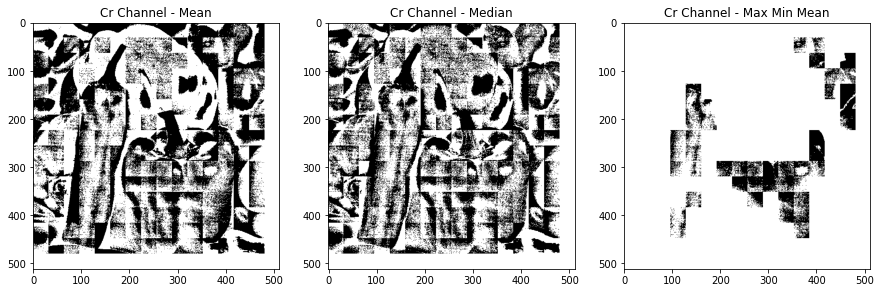

In [89]:
#Cr Channel - 1) 블록 안의 픽셀 밝기 분포에 대한 평균

#가로 세로 블록의 개수
N = 16 #(512픽셀이라 딱 나눠떨어지는 숫자로 골랐다.)

#블록 당 가로와 세로 크기 계산
dimh = np.int32(Cr_img.shape[0]/N)
dimw = np.int32(Cr_img.shape[1]/N)

dh_rest = np.int32(Cr_img.shape[0] % N)
dw_rest = np.int32(Cr_img.shape[1] % N)

#임계값 적용 후 output
output_mean = np.zeros((Cr_img.shape[0], Cr_img.shape[1]))
mean = np.zeros((N, N)) #평균값 저장 배열

#각 블록의 평균값 계산 함수
def mean_func(img, dimh, dimw, h, w) :
  count = 1
  sum = 0
  avg = 0
  for y in range(h, h+dimh) :
    for x in range(w, w+dimw) :
      sum = sum + img[y, x] #y, x가 맞나..? 높이, 너비? 평균이라 상관없나
      count = count+1

  avg = np.int32(sum / count)
  return avg

#각 블록의 평균값 계산
for h in range(0, Cr_img.shape[0]-dh_rest, dimh) : #0부터 dimh만큼 R_img[0]까지
  for w in range(0, Cr_img.shape[1] - dw_rest, dimw) :
    if(h + dimh < Cr_img.shape[0] and w + dimw < Cr_img.shape[1]) :
      mean[np.int32(h / dimh), np.int32(w/dimw)] = mean_func(Cr_img, dimh, dimw, h, w) #h/dimh 하면 dimh만큼이 한 픽셀이됨

#임계값 적용
for h in range(Cr_img.shape[0] - dh_rest) :
  for w in range(Cr_img.shape[1]- dw_rest) :
    if(Cr_img[h, w] >= mean[np.int32(h/dimh), np.int32(w/dimw)]) :
      output_mean[h, w] = 255
    else :
      output_mean[h, w] = 0

#화면 출력
plt.figure(figsize = (15, 15))

plt.subplot(1, 3, 1)
plt.title("Cr Channel - Mean")
plt.imshow(output_mean, cmap = 'gray')


#Cr Channel - 2) 블록 안의 픽셀 밝기의 중간값

#임계값 적용 후 output
output_median = np.zeros((Cr_img.shape[0], Cr_img.shape[1]))
median = np.zeros((N, N)) #중간값 저장 배열

#각 블록의 평균값 계산 함수
def median_func(img, dimh, dimw, h, w) :
  blockList = []
  median = 0
  for y in range(h, h+dimh) :
    for x in range(w, w+dimw) :
      blockList.append(img[y, x]) #블록 안의 픽셀값을 list에 넣고

  median = np.median(blockList) #np함수의 median으로 찾아서 출력
  return median

#각 블록의 중간값 계산
for h in range(0, Cr_img.shape[0] - dh_rest, dimh) : #0부터 dimh만큼 R_img[0]까지
  for w in range(0, Cr_img.shape[1] - dw_rest, dimw) :
    if(h + dimh < Cr_img.shape[0] and w + dimw < Cr_img.shape[1]) :
      median[np.int32(h / dimh), np.int32(w/dimw)] = median_func(Cr_img, dimh, dimw, h, w) #h/dimh 하면 dimh만큼이 한 픽셀이됨

#임계값 적용
for h in range(Cr_img.shape[0] - dh_rest) :
  for w in range(Cr_img.shape[1] - dw_rest) :
    if(Cr_img[h, w] >= median[np.int32(h/dimh), np.int32(w/dimw)]) :
      output_median[h, w] = 255
    else :
      output_median[h, w] = 0

#화면 출력
plt.subplot(1, 3, 2)
plt.title("Cr Channel - Median")
plt.imshow(output_median, cmap = 'gray')


#Cr Channel - 2) 블록 안의 픽셀 밝기의 최대값과 최소값의 평균 (max min mean)

#임계값 적용 후 output
output_mmm = np.zeros((Cr_img.shape[0], Cr_img.shape[1]))
mmm = np.zeros((N, N)) #중간값 저장 배열

#각 블록의 평균값 계산 함수
def mmm_func(img, dimh, dimw, h, w) :
  blockList = []
  mmm = 0
  for y in range(h, h+dimh) :
    for x in range(w, w+dimw) :
      blockList.append(img[y, x]) #블록 안의 픽셀값을 list에 넣고
  
  max = np.max(blockList)
  min = np.min(blockList)
  mmm = (max + min) / 2
  return mmm

#각 블록의 중간값 계산
for h in range(0, Cr_img.shape[0] - dh_rest, dimh) : #0부터 dimh만큼 R_img[0]까지
  for w in range(0, Cr_img.shape[1] - dw_rest, dimw) :
    if(h + dimh < Cr_img.shape[0] and w + dimw < Cr_img.shape[1]) :
      mmm[np.int32(h / dimh), np.int32(w/dimw)] = mmm_func(Cr_img, dimh, dimw, h, w) #h/dimh 하면 dimh만큼이 한 픽셀이됨

#임계값 적용
for h in range(Cr_img.shape[0] - dh_rest) :
  for w in range(Cr_img.shape[1] - dw_rest) :
    if(Cr_img[h, w] >= mmm[np.int32(h/dimh), np.int32(w/dimw)]) :
      output_mmm[h, w] = 255
    else :
      output_mmm[h, w] = 0

#화면 출력
plt.subplot(1, 3, 3)
plt.title("Cr Channel - Max Min Mean")
plt.imshow(output_mmm, cmap = 'gray')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:105: RuntimeWarning: overflow encountered in ubyte_scalars


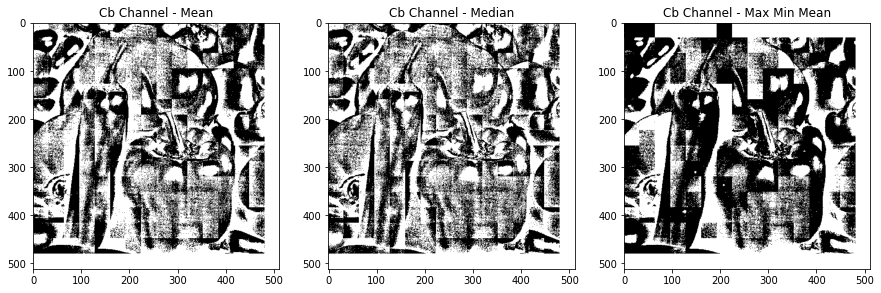

In [90]:
#Cb Channel - 1) 블록 안의 픽셀 밝기 분포에 대한 평균

#가로 세로 블록의 개수
N = 16 #(512픽셀이라 딱 나눠떨어지는 숫자로 골랐다.)

#블록 당 가로와 세로 크기 계산
dimh = np.int32(Cb_img.shape[0]/N)
dimw = np.int32(Cb_img.shape[1]/N)

dh_rest = np.int32(Cb_img.shape[0] % N)
dw_rest = np.int32(Cb_img.shape[1] % N)

#임계값 적용 후 output
output_mean = np.zeros((Cb_img.shape[0], Cb_img.shape[1]))
mean = np.zeros((N, N)) #평균값 저장 배열

#각 블록의 평균값 계산 함수
def mean_func(img, dimh, dimw, h, w) :
  count = 1
  sum = 0
  avg = 0
  for y in range(h, h+dimh) :
    for x in range(w, w+dimw) :
      sum = sum + img[y, x] #y, x가 맞나..? 높이, 너비? 평균이라 상관없나
      count = count+1

  avg = np.int32(sum / count)
  return avg

#각 블록의 평균값 계산
for h in range(0, Cb_img.shape[0]-dh_rest, dimh) : #0부터 dimh만큼 R_img[0]까지
  for w in range(0, Cb_img.shape[1] - dw_rest, dimw) :
    if(h + dimh < Cb_img.shape[0] and w + dimw < Cb_img.shape[1]) :
      mean[np.int32(h / dimh), np.int32(w/dimw)] = mean_func(Cb_img, dimh, dimw, h, w) #h/dimh 하면 dimh만큼이 한 픽셀이됨

#임계값 적용
for h in range(Cb_img.shape[0] - dh_rest) :
  for w in range(Cb_img.shape[1]- dw_rest) :
    if(Cb_img[h, w] >= mean[np.int32(h/dimh), np.int32(w/dimw)]) :
      output_mean[h, w] = 255
    else :
      output_mean[h, w] = 0

#화면 출력
plt.figure(figsize = (15, 15))

plt.subplot(1, 3, 1)
plt.title("Cb Channel - Mean")
plt.imshow(output_mean, cmap = 'gray')


#Cb Channel - 2) 블록 안의 픽셀 밝기의 중간값

#임계값 적용 후 output
output_median = np.zeros((Cb_img.shape[0], Cb_img.shape[1]))
median = np.zeros((N, N)) #중간값 저장 배열

#각 블록의 평균값 계산 함수
def median_func(img, dimh, dimw, h, w) :
  blockList = []
  median = 0
  for y in range(h, h+dimh) :
    for x in range(w, w+dimw) :
      blockList.append(img[y, x]) #블록 안의 픽셀값을 list에 넣고

  median = np.median(blockList) #np함수의 median으로 찾아서 출력
  return median

#각 블록의 중간값 계산
for h in range(0, Cb_img.shape[0] - dh_rest, dimh) : #0부터 dimh만큼 R_img[0]까지
  for w in range(0, Cb_img.shape[1] - dw_rest, dimw) :
    if(h + dimh < Cb_img.shape[0] and w + dimw < Cb_img.shape[1]) :
      median[np.int32(h / dimh), np.int32(w/dimw)] = median_func(Cb_img, dimh, dimw, h, w) #h/dimh 하면 dimh만큼이 한 픽셀이됨

#임계값 적용
for h in range(Cb_img.shape[0] - dh_rest) :
  for w in range(Cb_img.shape[1] - dw_rest) :
    if(Cb_img[h, w] >= median[np.int32(h/dimh), np.int32(w/dimw)]) :
      output_median[h, w] = 255
    else :
      output_median[h, w] = 0

#화면 출력
plt.subplot(1, 3, 2)
plt.title("Cb Channel - Median")
plt.imshow(output_median, cmap = 'gray')


#Cb Channel - 2) 블록 안의 픽셀 밝기의 최대값과 최소값의 평균 (max min mean)

#임계값 적용 후 output
output_mmm = np.zeros((Cb_img.shape[0], Cb_img.shape[1]))
mmm = np.zeros((N, N)) #중간값 저장 배열

#각 블록의 평균값 계산 함수
def mmm_func(img, dimh, dimw, h, w) :
  blockList = []
  mmm = 0
  for y in range(h, h+dimh) :
    for x in range(w, w+dimw) :
      blockList.append(img[y, x]) #블록 안의 픽셀값을 list에 넣고
  
  max = np.max(blockList)
  min = np.min(blockList)
  mmm = (max + min) / 2
  return mmm

#각 블록의 중간값 계산
for h in range(0, Cb_img.shape[0] - dh_rest, dimh) : #0부터 dimh만큼 R_img[0]까지
  for w in range(0, Cb_img.shape[1] - dw_rest, dimw) :
    if(h + dimh < Cb_img.shape[0] and w + dimw < Cb_img.shape[1]) :
      mmm[np.int32(h / dimh), np.int32(w/dimw)] = mmm_func(Cb_img, dimh, dimw, h, w) #h/dimh 하면 dimh만큼이 한 픽셀이됨

#임계값 적용
for h in range(Cb_img.shape[0] - dh_rest) :
  for w in range(Cb_img.shape[1] - dw_rest) :
    if(Cb_img[h, w] >= mmm[np.int32(h/dimh), np.int32(w/dimw)]) :
      output_mmm[h, w] = 255
    else :
      output_mmm[h, w] = 0

#화면 출력
plt.subplot(1, 3, 3)
plt.title("Cb Channel - Max Min Mean")
plt.imshow(output_mmm, cmap = 'gray')

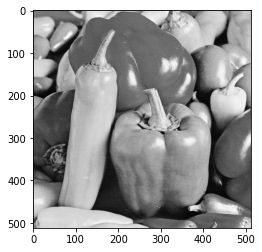

In [92]:
#히스토그램 스트레칭

#우선 RGB를 GrayScale 한다
gray_img = cv2.cvtColor(RGB_img1, cv2.COLOR_RGB2GRAY)
plt.imshow(gray_img, cmap = 'gray')

0 228


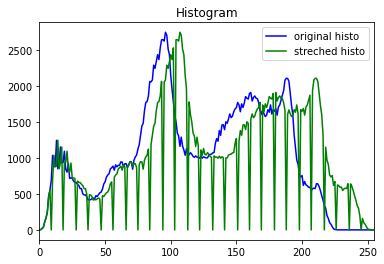

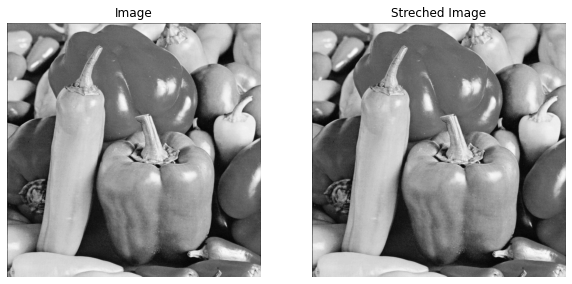

In [104]:
#output을 담을 공간
output_strech = np.zeros((gray_img.shape[0], gray_img.shape[1]))

def saturation(value) :
  if(value > 255) :
    value = 255
  return value

Nmax = 255
Nmin = 0
max = 0
min = 255

#영상 픽셀 중 최솟값, 최대값 찾기
for h in range(img.shape[0]) :
  for w in range(img.shape[1]) :
    if (gray_img[h, w] < min) :
      min = gray_img[h, w]
    if (gray_img[h, w] > max) :
      max = gray_img[h, w]

print(min, max)
#최대, 최소를 넘는 픽셀들은 saturation
for h in range(img.shape[0]) :
  for w in range(img.shape[1]) :
    if (gray_img[h, w] < min) :
      gray_img[h, w] = min
    if (gray_img[h, w] > max) :
      gray_img[h, w] = max

#히스토그램 스트레칭
for h in range(img.shape[0]) :
  for w in range(img.shape[1]) :
    output_strech[h, w] = saturation(np.int32((gray_img[h,w] - min)*np.float32((Nmax-Nmin)/(max-min)) + Nmin))

hist_original = cv2.calcHist([gray_img], [0], None, [256], [0, 255])
plt.title("Histogram")
plt.plot(hist_original, color='b', label='original histo')
plt.xlim([0, 255])

#어째선지 그냥 하면 오류가 떠서 np.float32형으로 바꿔주었다.
output_strech = np.float32(output_strech)

hist_output = cv2.calcHist([output_strech], [0], None, [256], [0, 255])
plt.plot(hist_output, color = 'g', label = 'streched histo')
plt.xlim([0, 255])
plt.legend()

#그림 화면 출력
plt.figure(figsize = (10, 10))
plt.subplot(1, 2, 1)
plt.title("Image")
plt.imshow(gray_img, cmap = 'gray')
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Streched Image")
plt.imshow(output_strech, cmap='gray')
plt.axis("off")
plt.show()

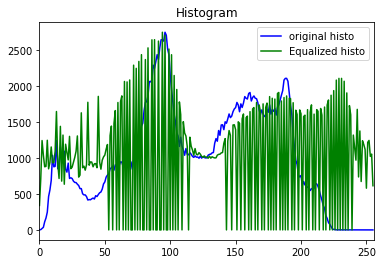

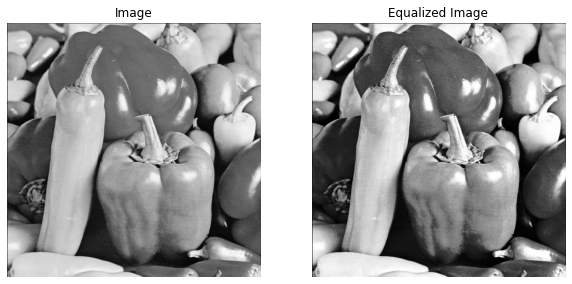

In [105]:
#히스토그램 평활화

output_equalization = cv2.equalizeHist(gray_img)

hist = cv2.calcHist([gray_img], [0], None, [256], [0, 256])
plt.title("Histogram")
plt.plot(hist, color = 'b', label = 'original histo')
plt.xlim([0, 256])

hist_equalization = cv2.calcHist([output_equalization], [0], None, [256], [0,256])
plt.plot(hist_equalization, color = 'g', label = 'Equalized histo')
plt.xlim([0, 256])
plt.legend()

#화면 출력
plt.figure(figsize = (10, 10))
plt.subplot(1, 2, 1)
plt.title("Image")
plt.imshow(gray_img, cmap='gray')
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Equalized Image")
plt.imshow(output_equalization, cmap='gray')
plt.axis("off")
plt.show()